# Picking mushrooms

The goal of this challenge is to do a complete machine learning project. We are using a
public mushroom dataset. We predict if the mushrooms are edible or poisonous from their
color and shape.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'figure.max_open_warning': 0})
rg_palette = sns.color_palette(palette=["red","green"])
sns.set_theme(style="darkgrid", palette=rg_palette)

## TASK 1 - Data Gathering

  * _Download the following Kaggle dataset_  
  _[https://www.kaggle.com/uciml/mushroom-classification](https://www.kaggle.com/uciml/mushroom-classification)_
  * _Import it into a pandas dataframe_

In [ ]:
# Reading downloaded CSV file into a pandas dataframe
df = pd.read_csv("mushrooms.csv")

# Displaying sample of the data
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5230,e,k,y,p,t,n,f,c,b,w,...,s,w,e,p,w,t,e,w,c,w
1077,p,f,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,n,v,g
3008,e,f,f,e,t,n,f,c,b,p,...,s,g,w,p,w,o,p,k,y,d
7659,e,k,f,w,f,n,f,w,b,w,...,k,w,w,p,w,t,p,w,s,g
334,e,x,y,w,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


In [ ]:
# We have 8124 rows and 23 columns

df.shape

(8124, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

  * _Check for missing values_

In [ ]:
# Checking for missing values
# .sum(axis=0) - summing of columns (default)
# .sum(axis=1) - summing of rows

df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No missing values. All features are categorical (or maybe ordinal).

## TASK 2 - Basic Data Exploration and Train-Validation-Split

  * _Explore the data and try to understand the features_

Information about the data from the source:

Attribute Information: (__class__: edible=e, poisonous=p)

  * __cap-shape__: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
  * __cap-surface__: fibrous=f, grooves=g, scaly=y, smooth=s
  * __cap-color__: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
  * __bruises__: bruises=t, no=f
  * __odor__: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
  * __gill-attachment__: attached=a, descending=d, free=f, notched=n
  * __gill-spacing__: close=c, crowded=w, distant=d
  * __gill-size__: broad=b, narrow=n
  * __gill-color__: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
  * __stalk-shape__: enlarging=e, tapering=t
  * __stalk-root__: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
  * __stalk-surface-above-ring__: fibrous=f, scaly=y, silky=k, smooth=s
  * __stalk-surface-below-ring__: fibrous=f, scaly=y, silky=k, smooth=s
  * __stalk-color-above-ring__: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
  * __stalk-color-below-ring__: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
  * __veil-type__: partial=p, universal=u
  * __veil-color__: brown=n, orange=o, white=w, yellow=y
  * __ring-number__: none=n, one=o, two=t
  * __ring-type__: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
  * __spore-print-color__: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w,yellow=y
  * __population__: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
  * __habitat__: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

We are counting the number of unique categories in each _Series_ of the dataframe.

### Basic data exploration

In [ ]:
# Using Series.nunique() to count number of different unique values in that Series (column)

print("Number of categories per each feature:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Number of categories per each feature:
class: 2
cap-shape: 6
cap-surface: 4
cap-color: 10
bruises: 2
odor: 9
gill-attachment: 2
gill-spacing: 2
gill-size: 2
gill-color: 12
stalk-shape: 2
stalk-root: 5
stalk-surface-above-ring: 4
stalk-surface-below-ring: 4
stalk-color-above-ring: 9
stalk-color-below-ring: 9
veil-type: 1
veil-color: 4
ring-number: 3
ring-type: 5
spore-print-color: 9
population: 6
habitat: 7


_veil-type_ contains only one category (_partial_), so it doesn't carry much of an information value.

In [ ]:
df[["veil-type"]].value_counts()

veil-type
p            8124
dtype: int64

_class_ seems to be balanced.

This matters because:

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more edible mushrooms than poisonous ones.

In such cases it is recommended to use stratified sampling as implemented in `StratifiedKFold` and `StratifiedShuffleSplit` to ensure that relative class frequencies is approximately preserved in each train and validation fold.

In [ ]:
df['class'].value_counts()
# Classes seems balanced

# Question: Why this matters? -> Perhaps ask Hannes

e    4208
p    3916
Name: class, dtype: int64

### Feature distributions

  * _Look for most important features_

We created a pairs of histograms for each feature.

You can see what features were prevalent when the mushrooms are poisonous on the __left__. The edible mushrooms are on the __right__.

In [ ]:
# similar_distributions:
#   features that show little difference in distribution
#   between poisonous and edible

similar_distributions = [
    "cap-shape",
    "gill-attachment",
    "veil-color",
    "ring-number"
]


# opposite_distributions:
#   features that show opposite distribution
#   between poisonous and edible

opposite_distributions = [
    "bruises",
    "odor",
    "gill-size",
    "spore-print-color"
]


# distinctive_distributions:
#   features that have one or few categories
#   that are distinctive in either
#   poisonous or edible class

distinctive_distributions = [
    "cap-surface",
    "gill-spacing",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "ring-type",
    "population",
    "habitat"
]

__Similar distributions__

Features that show little difference in distribution between poisonous and edible:

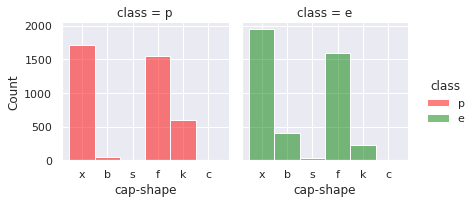

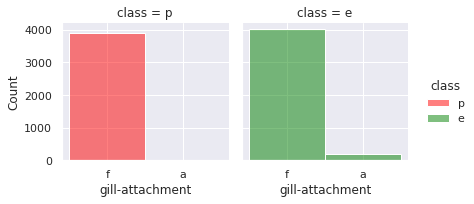

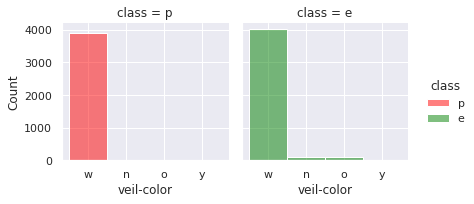

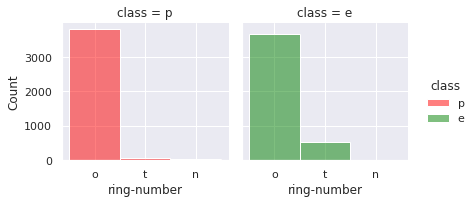

In [ ]:
for col in similar_distributions:
    sns.displot(
        df,
        x=col,
        hue="class",
        col="class",
        binwidth=3,
        height=3
    )

__Distinctive distributions__

Features that have one or few categories that are distinctive in either poisonous or edible class.

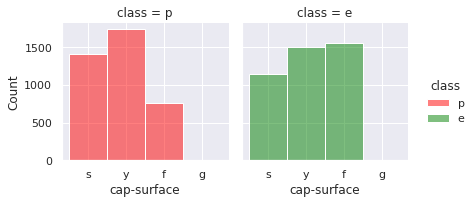

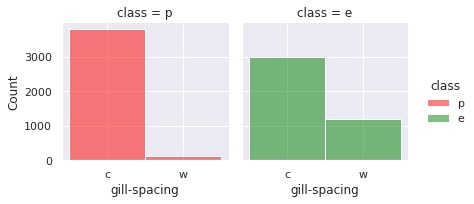

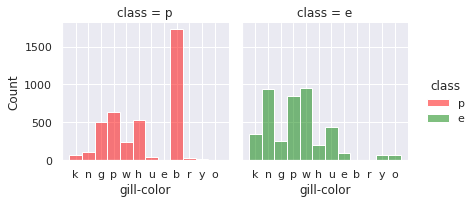

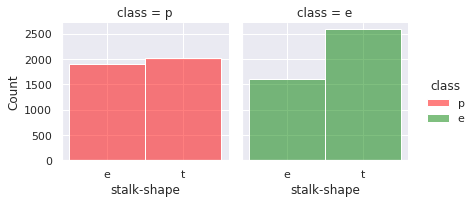

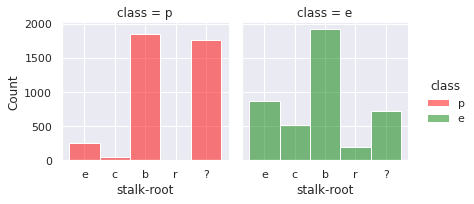

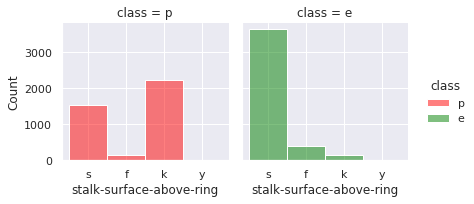

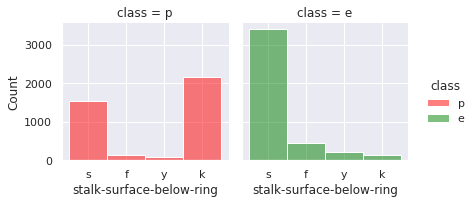

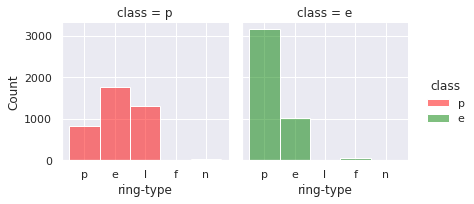

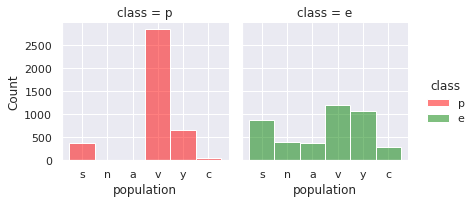

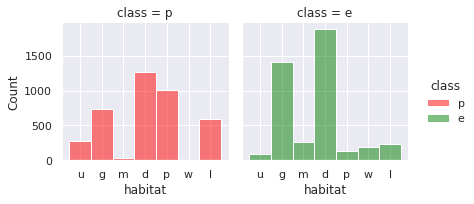

In [ ]:
for col in distinctive_distributions:
    sns.displot(
        df,
        x=col,
        hue="class",
        col="class",
        binwidth=3,
        height=3
    )

__Opposite distributions__

Features that show opposite distribution between poisonous and edible.

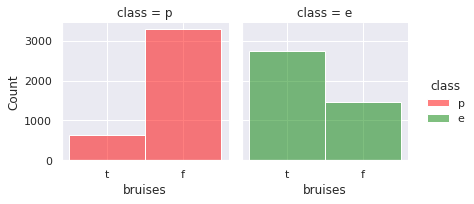

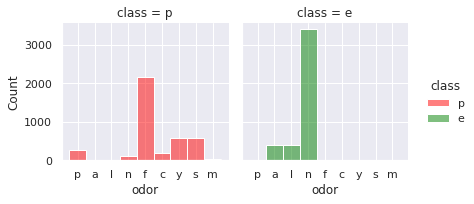

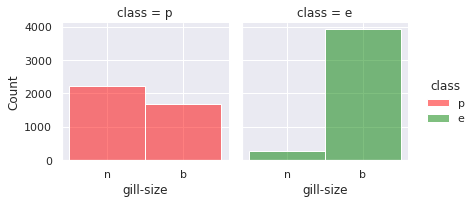

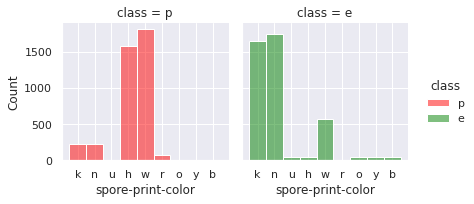

In [ ]:
for col in opposite_distributions:
    sns.displot(
        df,
        x=col,
        hue="class",
        col="class",
        binwidth=3,
        height=3
    )

### Dataset composition

During the process of _cross-validation_, we observed that certain _folds_ were predicted with lower accuracy than others. Once we _shuffled_ the dataset using the `ShuffleSplit` function, the accuracy was almost uniform.

This observation has lead us to a suspicion that the original dataset is somehow _ordered_ or _composed_ in certain way. This would explain that different  slices of original dataset might not be predicted by our models correctly.

With this in mind we have created following visualization of the dataframe, which __shows clearly that there is a pattern in dataset composture__.

Therefore we need to shuffle the dataset, ideally before the train-test split?

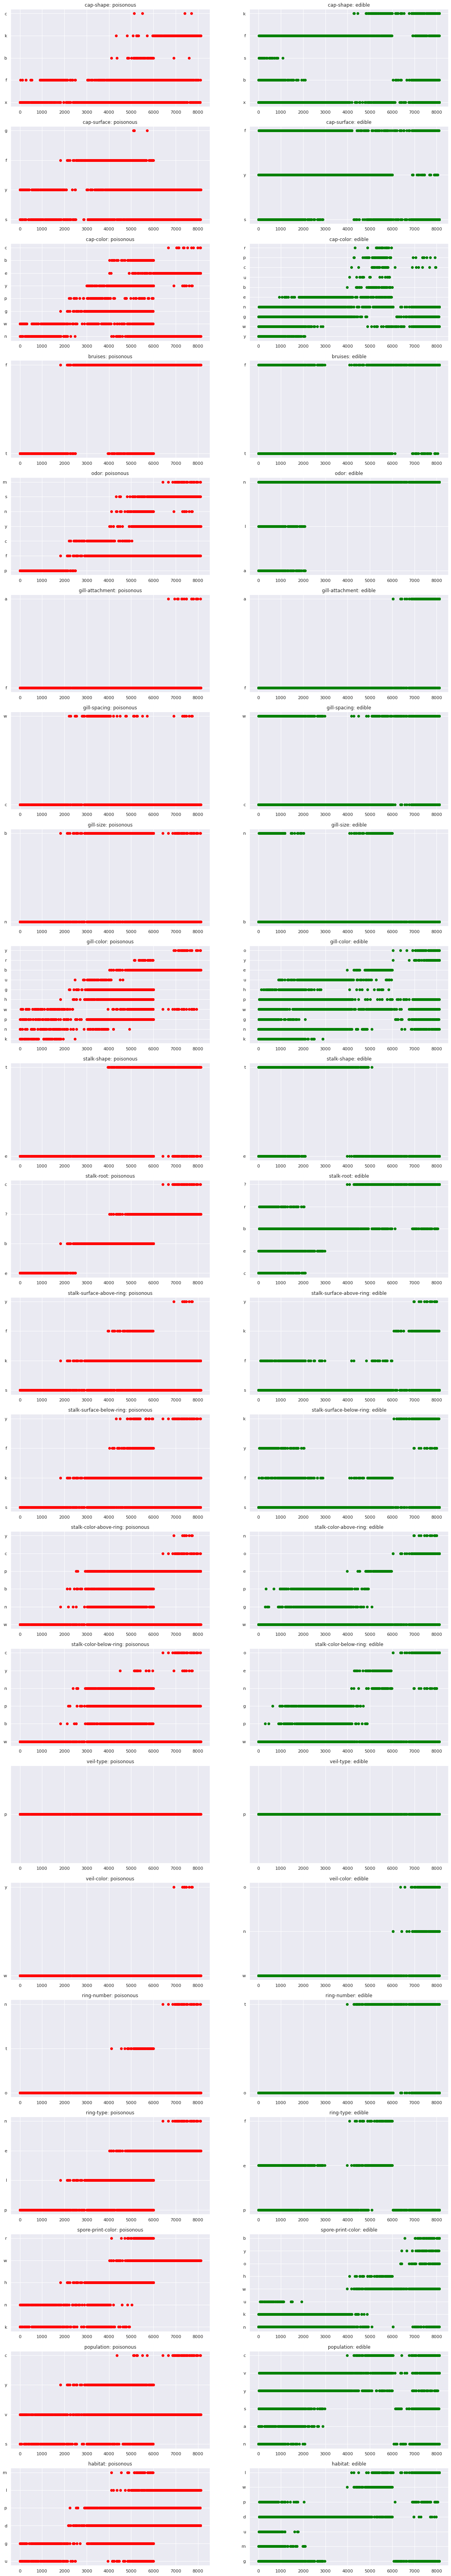

In [ ]:
# Create figure, axes array
# figsize 20 x 120 is fair enough
fig, axs = plt.subplots(ncols=2, nrows=len(df.columns)-1, figsize=(20, 120))

# index is initialized
i=0

# We iterate on all columns except the first one ("class"),
# therefor it's [1:]
for col in df.columns[1:]:

    # Plotting poisonous mushrooms in red
    axs[i][0].scatter(x=df[df["class"]=="p"].index, y=df[col][df["class"]=="p"], color="red")
    axs[i][0].set_title(f"{col}: poisonous")

    # Plotting edible mushrooms in green
    axs[i][1].scatter(x=df[df["class"]=="e"].index, y=df[col][df["class"]=="e"], color="green")
    axs[i][1].set_title(f"{col}: edible")
    i+=1

fig.show()

### Summary

__First look__:

  * Data set is clean and well-structured
  * There is no missing data
  * Labels are balanced

__Feature importance:__
  
  By comparing the distributions of features in both classes,
  we could identify groups of features based on their _importance_:

  * Seemingly __most important__ features are:
    * _cap-shape_
    * _gill-attachment_
    * _veil-color_
    * _ring-number_
  * Other __considerably important__ features are:
    * _cap-surface_
    * _gill-spacing_
    * _gill-color_
    * _stalk-shape_
    * _stalk-root_
    * _stalk-surface-above-ring_
    * _stalk-surface-below-ring_
    * _ring-type_
    * _population_
    * _habitat_
  * __Unimportant__ features are:
    * _veil-type_
    * _cap-shape_
    * _gill-attachment_
    * _veil-color_
    * _ring-number_

  The importance of each feature can be numerically determined by
  _recursive feature elimination_, which we'll eventually do
  and compare the results with the visual observation.

  On top of that, some feature values are distinctively more prevalent
  in particular class, so __one-hot encoding__ might improve model accuracy.

  We could improve model performance by another _recursive feature elimination_ after it.

  Also, picking _random forest classifier_ might provide best results with great explainability
  given the character of the data set (all features are categorical).

### Categorical data encoding

Due to the categorical character of the data set and low numbers of discrete values, __one-hot encoding__ is expected to be particularly useful.

In [ ]:
# label = column named "class"
# features = everything else -> entire dataframe except (drop) the "class"

X = df.drop(columns=['class']).copy()
y = df['class'].copy()

# This is shorter form:
# X, y = df.drop(columns=['class']), df['class'].copy()


### Train-Validation-Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting train and test set (15 %)
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.15, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6905, 22), (1219, 22), (6905,), (1219,))

## TASK 3 - Basic Model Training and Tuning

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LogisticRegression # This is the only classifier (algorithm)
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### One-hot Encoding

We will _one-hot_ encoding to both sets:

In [ ]:
# This is done upon X (whole data), so we pick up ALL the categories
categories_for_each_column = [X[col].unique() for col in X]
categories_for_each_column

[array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object),
 array(['s', 'y', 'f', 'g'], dtype=object),
 array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object),
 array(['t', 'f'], dtype=object),
 array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object),
 array(['f', 'a'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['n', 'b'], dtype=object),
 array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
       dtype=object),
 array(['e', 't'], dtype=object),
 array(['e', 'c', 'b', 'r', '?'], dtype=object),
 array(['s', 'f', 'k', 'y'], dtype=object),
 array(['s', 'f', 'y', 'k'], dtype=object),
 array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object),
 array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], dtype=object),
 array(['p'], dtype=object),
 array(['w', 'n', 'o', 'y'], dtype=object),
 array(['o', 't', 'n'], dtype=object),
 array(['p', 'e', 'l', 'f', 'n'], dtype=object),
 array(['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], dtype=ob

### Pipeline

We will create _pipeline_ object to simplify data preprocessing and model training.

In [ ]:
# Definition of pipeline for LogisticRegression classifier:
#   step 1: OneHotEncoder
#   step 2: LogisticRegression

pipe_LRC = make_pipeline(
    OneHotEncoder(categories=categories_for_each_column),
    LogisticRegression()
)

### Simple training (Logistic Regression)

We run the pipeline using training data. Then we print classification reports for training and testing data.

In [ ]:
# Running the pipeline
pipe_LRC.fit(X_train, y_train)

# Computing the prediction for both training and testing data
# to see how the model predicts the same data it was trained on
# and the test data.
y_train_prediction = pipe_LRC.predict(X_train)
y_test_prediction = pipe_LRC.predict(X_test)

# Print out the report with classification metrics
print("Training classification report:")
print(classification_report(y_train, y_train_prediction))

# Print out the report for testing data
print("Testing classification report:")
print(classification_report(y_test, y_test_prediction))



Training classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3571
           p       1.00      1.00      1.00      3334

    accuracy                           1.00      6905
   macro avg       1.00      1.00      1.00      6905
weighted avg       1.00      1.00      1.00      6905

Testing classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [ ]:
# k-fold cross-validation (k=5)
scores_LRC = cross_val_score(pipe_LRC, X, y, cv=5)
print(f"Model accuracy = {scores_LRC.mean() * 100}% with standard deviation = {scores_LRC.std() * 100}%")

Model accuracy = 91.93427813565745% with standard deviation = 13.10067820916054%


### Trying out different algorithms

__RandomForestClassifier__

In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Creating pipeline with RandomForestClassifier
#   step 1: OneHotEncoder
#   step 2: RandomForestClassifier

pipe_RFC = make_pipeline(
    OneHotEncoder(categories=categories_for_each_column),
    RandomForestClassifier()
)

In [ ]:
# Running the pipeline
pipe_RFC.fit(X_train, y_train)

# Computing the prediction for both training and testing data
# to see how the model predicts the same data it was trained on
# and the test data.
y_train_prediction = pipe_RFC.predict(X_train)
y_test_prediction = pipe_RFC.predict(X_test)

# Print out the report with classification metrics
print("Training classification report:")
print(classification_report(y_train, y_train_prediction))

# Print out the report for testing data
print("Testing classification report:")
print(classification_report(y_test, y_test_prediction))


Training classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3571
           p       1.00      1.00      1.00      3334

    accuracy                           1.00      6905
   macro avg       1.00      1.00      1.00      6905
weighted avg       1.00      1.00      1.00      6905

Testing classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [ ]:
# k-fold cross-validation (k=5)
scores_RFC = cross_val_score(pipe_RFC, X, y, cv=5)
print(f"Model accuracy = {scores_RFC.mean() * 100}% with standard deviation = {scores_RFC.std() * 100}%")

Model accuracy = 93.97977264115195% with standard deviation = 7.386646466399759%


__KNeighborsClassifier__

In [ ]:
# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Creating pipeline with KNeighborsClassifier
#   step 1: OneHotEncoder
#   step 2: KNeighborsClassifier

pipe_KNC = make_pipeline(
    OneHotEncoder(categories=categories_for_each_column),
    KNeighborsClassifier()
)

In [ ]:
# Running the pipeline
pipe_KNC.fit(X_train, y_train)

# Computing the prediction for both training and testing data
# to see how the model predicts the same data it was trained on
# and the test data.
y_train_prediction = pipe_KNC.predict(X_train)
y_test_prediction = pipe_KNC.predict(X_test)

# Print out the report with classification metrics
print("Training classification report:")
print(classification_report(y_train, y_train_prediction))

# Print out the report for testing data
print("Testing classification report:")
print(classification_report(y_test, y_test_prediction))


Training classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3571
           p       1.00      1.00      1.00      3334

    accuracy                           1.00      6905
   macro avg       1.00      1.00      1.00      6905
weighted avg       1.00      1.00      1.00      6905

Testing classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [ ]:
# k-fold cross-validation (k=5)
scores_KNC = cross_val_score(pipe_KNC, X_train, y_train, cv=5)
print(f"Model accuracy = {scores_KNC.mean() * 100}% with standard deviation = {scores_KNC.std() * 100}%")

Model accuracy = 100.0% with standard deviation = 0.0%


In [ ]:
# This one is done using ShuffleSplit
#
# ShuffleSplit creates training set and testing set
#   just like train-test split, but it shuffles the whole set
#   before splitting. It can do this n-times.

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

# Cross-validation strategy = ShuffleSplit
#   - this creates 5 splits to 70% train set and 30% test set
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scoring = "accuracy"

scores_LRC = cross_validate(pipe_LRC, X_train, y_train, cv=cv, scoring=scoring)
scores_RFC = cross_validate(pipe_RFC, X_train, y_train, cv=cv, scoring=scoring)
scores_KNC = cross_validate(pipe_KNC, X_train, y_train, cv=cv, scoring=scoring)

print(f"Model accuracy (LRC) = {scores_LRC['test_score'].mean() * 100}% with standard deviation = {scores_LRC['test_score'].std() * 100}%")
print(f"Model accuracy (RFC) = {scores_RFC['test_score'].mean() * 100}% with standard deviation = {scores_RFC['test_score'].std() * 100}%")
print(f"Model accuracy (KNC) = {scores_KNC['test_score'].mean() * 100}% with standard deviation = {scores_KNC['test_score'].std() * 100}%")

Model accuracy (LRC) = 100.0% with standard deviation = 0.0%
Model accuracy (RFC) = 100.0% with standard deviation = 0.0%
Model accuracy (KNC) = 100.0% with standard deviation = 0.0%


## TASK 4 - Column Transformer and Feature Engineering

We are using `make_pipeline` to build the estimator pipeline, so to add column transformer, we need to change the pipelines.

In [ ]:
from sklearn import set_config

# This is a cool setting to enable visualization of composite estimators (pipelines, column transformers and such)
set_config(display='diagram')

In [ ]:
pipe_KNC

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(categories=[array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object),
                                           array(['s', 'y', 'f', 'g'], dtype=object),
                                           array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object),
                                           array(['t', 'f'], dtype=object),
                                           array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object),
                                           array(['f', 'a'], dtype=object),
                                           array(['c', 'w'], dtype=objec...
                                           array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], dtype=object),
                                           array(['p'], dtype=object),
                                           array(['w', 'n', 'o', 'y'], dtype=object),
                                           array(['o', 't', 'n'], dtype=object),
                                           array(['p', 'e', 'l', 'f', 'n'], dtype=object),
                                           array(['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], dtype=object),
                                           array(['s', 'n', 'a', 'v', 'y', 'c'], dtype=object),
                                           array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

Now we'll do the column transformer thingy. The content will be:

1. do a OneHotEncoder on all the columns (except _veil-type_, we drop it)

That's pretty much it. As the data set contains all categorical data, the one-hot encoding is the most appropriate thing to do. However, there might be a need to do the feature elimination. Either before or after the one-hot encoding.

In [ ]:
# Importing necessary function 
from sklearn.compose import ColumnTransformer

# We need to identify columns on which the transformation step is performed.
# And we want to do one-hot encoding on all of the columns (all are categorical)
all_cols = X.columns.drop("veil-type")

# Actually creating the column transformer
col_transform = ColumnTransformer(
    
    [("one-hot-encoder", OneHotEncoder(sparse=False, dtype=np.int64), all_cols)],

    # here we specify what to do with the remainder columns (none in our case)
    remainder="drop"
)

# By running this we will display fancy visualization of the column transformer
col_transform

ColumnTransformer(transformers=[('one-hot-encoder',
                                 OneHotEncoder(dtype=<class 'numpy.int64'>,
                                               sparse=False),
                                 Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object'))])

In [ ]:
# This runs fit and transform on the training set
col_transform.fit_transform(X_train)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Now we'll update all pipelines by introducing the column transformer into them.

In [ ]:
pipe_LRC = make_pipeline(
    col_transform,
    LogisticRegression(),
)

pipe_LRC

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(dtype=<class 'numpy.int64'>,
                                                                sparse=False),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipe_RFC = make_pipeline(
    col_transform,
    RandomForestClassifier(),
)

pipe_RFC

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(dtype=<class 'numpy.int64'>,
                                                                sparse=False),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
pipe_KNC = make_pipeline(
    col_transform,
    KNeighborsClassifier(),
)

pipe_KNC

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(dtype=<class 'numpy.int64'>,
                                                                sparse=False),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

Now we can run them using default parameters and calculate cross-validation scores:

In [ ]:
scores_LRC = cross_validate(pipe_LRC, X_train, y_train, cv=cv, scoring=scoring)
scores_RFC = cross_validate(pipe_RFC, X_train, y_train, cv=cv, scoring=scoring)
scores_KNC = cross_validate(pipe_KNC, X_train, y_train, cv=cv, scoring=scoring)

print(f"Model accuracy (LRC) = {scores_LRC['test_score'].mean() * 100}% with standard deviation = {scores_LRC['test_score'].std() * 100}%")
print(f"Model accuracy (RFC) = {scores_RFC['test_score'].mean() * 100}% with standard deviation = {scores_RFC['test_score'].std() * 100}%")
print(f"Model accuracy (KNC) = {scores_KNC['test_score'].mean() * 100}% with standard deviation = {scores_KNC['test_score'].std() * 100}%")

Model accuracy (LRC) = 100.0% with standard deviation = 0.0%
Model accuracy (RFC) = 100.0% with standard deviation = 0.0%
Model accuracy (KNC) = 100.0% with standard deviation = 0.0%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=050059c2-35b1-40a8-8328-a3e1a8db3725' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>